In [96]:
import pandas as pd
import numpy as np
import src.generation.gamma as ga
import src.generation.multivariate_normal as mn
from src.generation.base.generator import BaseGenerator

import matplotlib.pyplot as plt

In [97]:
# params
N = 1000
F = N
size=100

In [98]:
def gamma_wrapper(cor: float) -> BaseGenerator:
    return ga.Generator(F, size, cor, (2,4))

def mn_wrapper(cor: float) -> BaseGenerator:
    return mn.Generator(F, size, cor, (4,6), (1,1))

In [99]:
def calc(wrapper, cor: float):
    generator = wrapper(cor)
    vectors = generator.generate_cloud_load_vectors()
    cm = np.corrcoef(vectors)
    # return cm[cm != 1]
    return np.mean(cm[cm != 1])

calc(gamma_wrapper, 0.5)

0.4546509519468193

In [100]:
from tqdm import tqdm

repeats = 50
cor_rng = np.arange(0, 1.01, 0.05)

In [101]:
%%time
ga_res = []

for cor in cor_rng:
    for _ in range(repeats):
        r_ga = calc(gamma_wrapper, cor)

        ga_res.append((cor, r_ga))

CPU times: user 7min 47s, sys: 2min 39s, total: 10min 26s
Wall time: 4min 36s


In [102]:
%%time
repeats = 4
mn_res = []

for cor in cor_rng:
    for _ in range(repeats):
        r_mn = calc(mn_wrapper, cor)

        mn_res.append((cor, r_mn))

CPU times: user 5min 15s, sys: 1min 14s, total: 6min 30s
Wall time: 3min 10s


In [103]:
df_ga = pd.DataFrame(ga_res, columns=['expected', 'actual'])
df_mn = pd.DataFrame(mn_res, columns=['expected', 'actual'])

In [104]:
grped = df_ga.groupby('expected').agg({'actual': ['mean', 'count', 'std']})
mnped = df_mn.groupby('expected').agg({'actual': ['mean', 'count', 'std']})

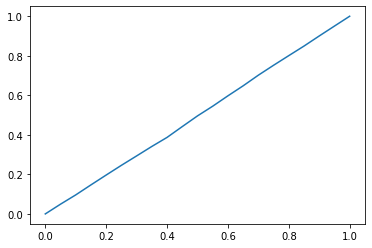

In [105]:
plt.plot(grped.index, grped.actual['mean'])
plt.show()

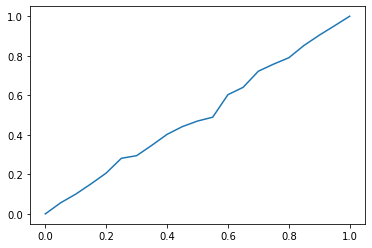

In [106]:
plt.plot(mnped.index, mnped.actual['mean'])
plt.show()

In [107]:
grped

actual                
              mean count       std
expected                          
0.00      0.000272    50  0.000163
0.05      0.049550    50  0.007256
0.10      0.096408    50  0.012782
0.15      0.147098    50  0.016415
0.20      0.196840    50  0.023403
0.25      0.246004    50  0.023456
0.30      0.293519    50  0.027591
0.35      0.341432    50  0.024846
0.40      0.387166    50  0.031161
0.45      0.441885    50  0.031401
0.50      0.495893    50  0.027094
0.55      0.544964    50  0.025623
0.60      0.597421    50  0.028455
0.65      0.648022    50  0.026368
0.70      0.701844    50  0.014111
0.75      0.751989    50  0.019417
0.80      0.800741    50  0.012962
0.85      0.849082    50  0.010077
0.90      0.900136    50  0.005655
0.95      0.950156    50  0.001957
1.00      0.999897    50  0.000155

In [108]:
mnped

actual                    
              mean count           std
expected                              
0.00      0.000099     4  1.305832e-04
0.05      0.055929     4  6.611678e-03
0.10      0.100222     4  9.679185e-03
0.15      0.151811     4  2.419040e-02
0.20      0.206640     4  1.193265e-02
0.25      0.281506     4  2.354768e-02
0.30      0.294641     4  2.721449e-02
0.35      0.347130     4  3.801531e-02
0.40      0.402429     4  2.070374e-02
0.45      0.441473     4  5.794211e-02
0.50      0.469800     4  2.754646e-02
0.55      0.489312     4  4.613005e-02
0.60      0.603197     4  1.665900e-02
0.65      0.640380     4  2.364393e-02
0.70      0.722021     4  2.748915e-02
0.75      0.757743     4  1.432826e-02
0.80      0.789933     4  2.715640e-02
0.85      0.852306     4  1.166684e-02
0.90      0.903982     4  7.057607e-03
0.95      0.951521     4  1.065087e-02
1.00      1.000000     4  1.571727e-14